In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Contours

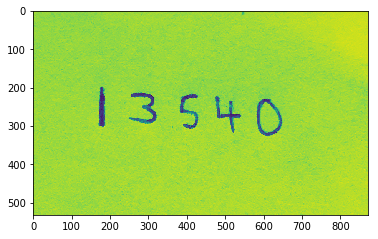

In [2]:
image=cv2.imread("numbers.jpg",0)


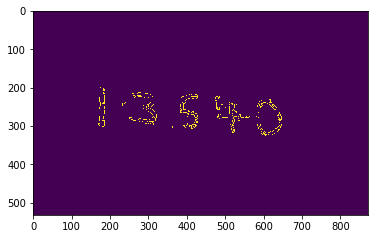

In [3]:
canny=cv2.Canny(image,30,200)
plt.imshow(canny)
plt.show()

In [ ]:
contours=cv2.findContours(canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
print(contours[1])

In [11]:
cv2.drawContours(image,contours[1],-1,(0,255,0),3)
cv2.imshow("contours",image)
cv2.waitKey()
cv2.destroyAllWindows()

# Identifying shapes

In [40]:
image=cv2.imread("images/someshapes.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [41]:
ret,thresh=cv2.threshold(image,127,255,1)

In [42]:
_,contours,heirarchy=cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

In [52]:
for cnt in contours:
    approx=cv2.approxPolyDP(cnt,1*cv2.arcLength(cnt,True),True)
    
    if len(approx)==3:
        print("in triangle")
        shape_name="Triangle"
        cv2.drawContours(image,[cnt],(0,255,0),-1)
        M=cv2.moments(cnt)
        cx=int(M['m10']/M['m00'])
        cy=int(M['m01']/M['m00'])
        cv2.putText(image,shape_name,(cx-50,cy),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1)
    elif len(approx)==4:
        print("in 4")
        x,y,w,h=cv2.boundindRect(cnt)
        M=cv2.moments(cnt)
        cx=int(M['m10']/M['m00'])
        cy=int(M['m01']/M['m00'])
        if abs(w-h)<=3:
            shape_name='square'
            cv2.drawContours(image,[cnt],(0,255,150),-1)
            cv2.putText(image,shape_name,(cx-50,cy),cv2.FONT_HERSHEY_SIMPLEX,(0,0,0),1)
        else:
            shape_name='rectangle'
            M=cv2.moments(cnt)
            cx=int(M['m10']/M['m00'])
            cy=int(M['m01']/M['m00'])
            cv2.drawContours(image,[cnt],(0,255,255),-1)
            cv2.putText(image,shape_name,(cx-50,cy),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1)
    elif len(approx)==10:
        shape_name='star'
        cv2.drawContours(image,[cnt],(255,0,255),-1)
        M=cv2.moments(cnt)
        cx=int(M['m10']/M['m00'])
        cy=int(M['m01']/M['m00'])
        cv2.putText(image,shape_name,(cx-50,cy),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1)
    elif len(approx)>=15:
        shape_name='circle'
        cv2.drawContours(image,[cnt],(255,255,127),-1)
        M=cv2.moments(cnt)
        cx=int(M['m10']/M['m00'])
        cy=int(M['m01']/M['m00'])
        cv2.putText(image,shape_name,(cx-50,cy),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1)
    cv2.imshow('image',image)
    cv2.waitKey()
cv2.destroyAllWindows()

#  Probabilistic  hough lines

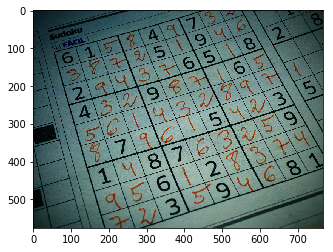

In [3]:
image=cv2.imread('images/soduku.jpg')
plt.imshow(image)

In [11]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
canny=cv2.Canny(gray,100,170,apertureSize=3)
lines=cv2.HoughLinesP(canny,1,np.pi/180,200,5,1)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),3)
cv2.imshow('plines',image)
cv2.waitKey()
cv2.destroyAllWindows()